In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import backend as K
print(K.epsilon())
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

2.9.1
1e-07


In [2]:
'''MNIST DATASET - Ładowane tak jak poprzednio'''
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
num_labels = len(np.unique(y_train))
print('Ilość etykiet: ',num_labels)

#Konwersja na One-hot-encoding

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)


Ilość etykiet:  10


In [4]:
image_size = X_train.shape[1]
X_train = np.reshape(X_train,[-1,image_size,image_size,1])
X_test = np.reshape(X_test,[-1,image_size,image_size,1])

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### Parametry sieci 

In [5]:
input_shape = (image_size,image_size,1)
batch_size = 128
kernel_size = 3
filters = 64
dropout = 0.3

# <font color="red"> Do tego momentu kod odpowiadał klasycznej CNN</font>
## <font color="blue"> Teraz przechodzę na funkcyjne API Kerasa</font>

In [6]:
inputs = Input(shape = input_shape)
y = Conv2D(filters=filters, kernel_size=kernel_size,activation='relu')(inputs)

In [9]:
inputs

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')>

In [7]:
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
          kernel_size=kernel_size,
          activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
          kernel_size=kernel_size,
          activation='relu')(y)

#### Spłaszczenie obrazu, regularyzacja, konstruowanie modelu 

In [8]:
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels,activation='softmax')(y)
'''
Funkcja Dense to warstwa gęsta w sieci neuronowej, 
która jest w pełni połączona. W przypadku klasyfikacji wieloklasowej,
zwykle wykorzystuje się ostatnią warstwę gęstą z funkcją aktywacji softmax, 
która zwraca prawdopodobieństwa przynależności do każdej z klas.

Aby określić liczbę neuronów w warstwie Dense, która odpowiada liczbie klas, 
musisz znać liczbę klas w problemie klasyfikacji. W tym przypadku, num_labels jest liczbą klas, 
a warstwa Dense będzie miała num_labels neuronów wyjściowych, 
które reprezentują prawdopodobieństwo przynależności do każdej klasy.

Na przykład, jeśli masz problem klasyfikacji obrazów na 10 klas (np. cyfry od 0 do 9), 
to num_labels będzie wynosiło 10, a warstwa Dense zwróci prawdopodobieństwo przynależności do każdej z tych klas.
'''



'\nFunkcja Dense to warstwa gęsta w sieci neuronowej, \nktóra jest w pełni połączona. W przypadku klasyfikacji wieloklasowej,\nzwykle wykorzystuje się ostatnią warstwę gęstą z funkcją aktywacji softmax, \nktóra zwraca prawdopodobieństwa przynależności do każdej z klas.\n\nAby określić liczbę neuronów w warstwie Dense, która odpowiada liczbie klas, \nmusisz znać liczbę klas w problemie klasyfikacji. W tym przypadku, num_labels jest liczbą klas, \na warstwa Dense będzie miała num_labels neuronów wyjściowych, \nktóre reprezentują prawdopodobieństwo przynależności do każdej klasy.\n\nNa przykład, jeśli masz problem klasyfikacji obrazów na 10 klas (np. cyfry od 0 do 9), \nto num_labels będzie wynosiło 10, a warstwa Dense zwróci prawdopodobieństwo przynależności do każdej z tych klas.\n'

In [10]:
#Konstrukcja modelu
model = Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

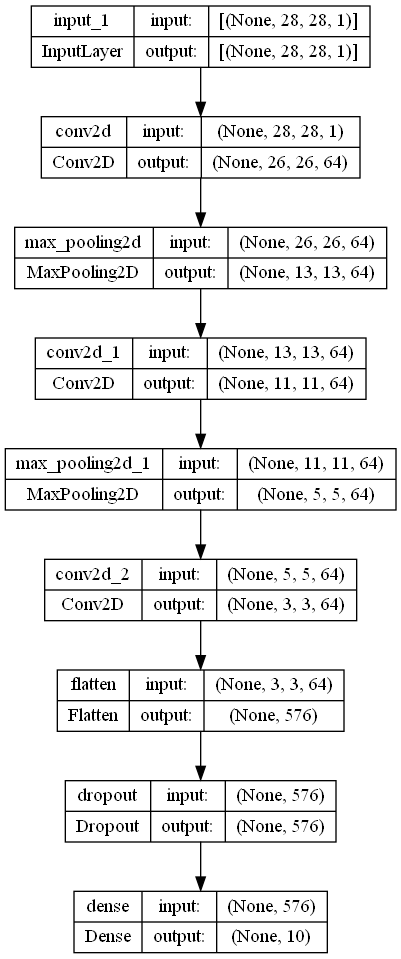

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='Funkcyjne API CNN.png',show_shapes=True)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 31s 62ms/step - loss: 0.2699 - accuracy: 0.9171 - val_loss: 0.0624 - val_accuracy: 0.9783
Epoch 2/20
469/469 [==============================] - 33s 70ms/step - loss: 0.0712 - accuracy: 0.9776 - val_loss: 0.0447 - val_accuracy: 0.9862
Epoch 3/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 4/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0396 - accuracy: 0.9876 - val_loss: 0.0310 - val_accuracy: 0.9900
Epoch 5/20
469/469 [==============================] - 30s 63ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0241 - val_accuracy: 0.9914
Epoch 7/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0232 - val_accuracy:

In [16]:
#Dokładność na zbiorze testowym
_, acc = model.evaluate(X_test,y_test,batch_size = batch_size, verbose= 0)
print('\nDokładność na zbiorze testowym: %.1f%%' % (100.0 * acc))


Dokładność na zbiorze testowym: 99.4%
